<a href="https://colab.research.google.com/github/Dhanraj7573/small-project-series-/blob/main/Sector_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project compares how different stock market sectors perform over a chosen period.
We’ll pick a few companies, label each with its sector (like Technology, Energy, Healthcare), and then use real stock data from Yahoo Finance to see which sector had the highest average return.

The program will:

Download daily prices for several stocks using yfinance.

Calculate each stock’s total return for the selected time window.

Group the stocks by sector and find the average return for each group.

Display a simple table (and optionally a bar chart) showing which sectors performed best or worst.

The goal is to turn raw stock prices into a clear, easy-to-understand comparison of sector performance — a mini “league table” for sectors.

In [49]:
import yfinance as yf
from datetime import date, timedelta

SECTORS = {
  "technology": ['NVDA','MSFT','AAPL','AVGO','ORCL','PLTR','CSCO','IBM','AMD','CRM'],
  "energy":     ['XOM','CVX','COP','WMB','MPC','EOG','KMI','PSX','SLB','VLO'],
  "industrials":['GE','CAT','RTX','BA','ETN','HON','DE','LMT','NOC','EMR']
}

tickers = SECTORS["technology"] + SECTORS["energy"] + SECTORS["industrials"]


end_date = date.today()
start_date = end_date - timedelta(days=365)

stock_data = yf.download(tickers, start=start_date, end=end_date)

# Display the data
display(stock_data.head())

/tmp/ipython-input-468254572.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  30 of 30 completed


Price            Close                                                  \
Ticker            AAPL         AMD        AVGO          BA         CAT   
Date                                                                     
2024-10-07  220.663040  170.970001  173.379547  155.910004  392.044037   
2024-10-08  224.724136  172.800003  178.974655  154.649994  381.914398   
2024-10-09  228.476654  171.020004  184.143951  149.369995  390.016174   
2024-10-10  227.978973  164.179993  183.886490  146.619995  390.459198   
2024-10-11  226.495895  167.889999  179.717361  151.020004  395.755341   

Price                                                                  ...  \
Ticker             COP         CRM       CSCO         CVX          DE  ...   
Date                                                                   ...   
2024-10-07  111.136391  282.857880  51.189911  144.563232  400.412262  ...   
2024-10-08  107.338837  289.815765  51.404385  142.296082  394.732086  ...   
2024-10-09  107.503532  286.187744  52.213516  143.157013  399.860046  ...   
2024-10-10  108.365723  288.424194  52.194023  144.084946  400.136139  ...   
2024-10-11  107.038521  286.366669  52.886173  144.850220  405.382416  ...   

Price       Volume                                                            \
Ticker         NOC       NVDA     ORCL      PLTR      PSX      RTX       SLB   
Date                                                                           
2024-10-07  436200  346250200  6791000  44124800  1812900  4606100   8963600   
2024-10-08  422500  285722500  7845400  62542900  2528900  3194500  13404700   
2024-10-09  428500  246191600  8120900  86404700  1494300  3210400   9980700   
2024-10-10  372800  242311300  7115900  62516300  1416400  2785300   9707400   
2024-10-11  325100  170209500  5869400  66206900  1460600  2556200   8892300   

Price                                   
Ticker          VLO      WMB       XOM  
Date                                    
2024-10-07  1983100  4998700  15714400  
2024-10-08  4177700  5605100  14818500  
2024-10-09  2372300  4044300  11144900  
2024-10-10  2300900  4400100  10243300  
2024-10-11  1632000  9246600   8294800  

[5 rows x 150 columns]

In [48]:
# The total return is the percentage change from the first day's closing price to the last day's closing price

total_returns = (stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0]) - 1

display(total_returns)

,0
Ticker,
AAPL,0.169294
AMD,-0.036849
AVGO,0.951614
BA,0.387339
CAT,0.269883
COP,-0.152753
CRM,-0.150245
CSCO,0.326824
CVX,0.062165


In [43]:
#daily return for each stock
daily_returns = stock_data['Close'].pct_change()
daily_returns.dropna(inplace=True)
print(daily_returns.head())

Ticker          AAPL       AMD      AVGO        BA       CAT       COP  \
Date                                                                     
2024-10-08  0.018404  0.010704  0.032271 -0.008082 -0.025838 -0.034170   
2024-10-09  0.016698 -0.010301  0.028883 -0.034142  0.021214  0.001534   
2024-10-10 -0.002178 -0.039995 -0.001398 -0.018411  0.001136  0.008020   
2024-10-11 -0.006505  0.022597 -0.022672  0.030010  0.013564 -0.012247   
2024-10-14  0.016480 -0.015605  0.004574 -0.013442 -0.020074 -0.009232   

Ticker           CRM      CSCO       CVX        DE  ...       NOC      NVDA  \
Date                                                ...                       
2024-10-08  0.024599  0.004190 -0.015683 -0.014186  ... -0.002472  0.040479   
2024-10-09 -0.012518  0.015741  0.006050  0.012991  ... -0.000789 -0.001806   
2024-10-10  0.007815 -0.000373  0.006482  0.000690  ... -0.009657  0.016284   
2024-10-11 -0.007134  0.013261  0.005311  0.013111  ...  0.003054 -0.000074   
2024-10

In [73]:
# lets see the winner and looser stock and which days
import pandas as pd
import matplotlib.pyplot as plt
winner=daily_returns.idxmax()
looser=daily_returns.idxmin()

best_day=daily_returns.max()
worst_day=daily_returns.min()
dr = daily_returns.dropna(how="all")

# Build per-ticker summary in one go
summary = dr.agg(['idxmax', 'max', 'idxmin', 'min']).T
summary.columns = ['best_date', 'best_ret', 'worst_date', 'worst_ret']
summary['best_date'] = pd.to_datetime(summary['best_date']).dt.strftime('%d-%m-%Y')
summary['worst_date'] = pd.to_datetime(summary['worst_date']).dt.strftime('%d-%m-%Y')
summary[['best_ret', 'worst_ret']] *= 100

print(summary.round(2))



         best_date   best_ret  worst_date  worst_ret
Ticker                                              
AAPL    09-04-2025  15.328847  03-04-2025  -9.245607
AMD     09-04-2025   23.82048  30-10-2024 -10.616538
AVGO    13-12-2024  24.432644  27-01-2025 -17.396816
BA      09-04-2025  15.374136  03-04-2025 -10.471045
CAT     09-04-2025   9.881724  03-04-2025  -8.635635
COP     09-04-2025  10.706506  03-04-2025 -10.226193
CRM     04-12-2024  10.994792  03-04-2025   -6.00649
CSCO    09-04-2025   9.287465  03-04-2025  -6.676435
CVX     09-04-2025   6.645731  04-04-2025  -8.224441
DE      09-04-2025    9.58861  14-08-2025  -6.757012
EMR     09-04-2025  10.918743  03-04-2025  -8.651606
EOG     09-04-2025   8.660444  10-04-2025  -8.277073
ETN     09-04-2025  12.759443  27-01-2025 -15.564539
GE      09-04-2025  10.568576  04-04-2025 -11.096314
HON     09-04-2025   8.881124  04-04-2025  -7.591441
IBM     30-01-2025  12.964168  24-07-2025  -7.623846
KMI     06-11-2024   6.636997  27-01-2025  -9.

In [69]:
# now narrow it down which is the highest performing stock and which is the lowest performing stock

highest_performing_stock = summary.loc[summary['best_ret'].idxmax()]
lowest_performing_stock = summary.loc[summary['worst_ret'].idxmin()]

print("Highest Performing Stock:")
print(highest_performing_stock)

print("\nLowest Performing Stock:")
print(lowest_performing_stock)

Highest Performing Stock:
best_date     10-09-2025
best_ret        35.94882
worst_date    27-01-2025
worst_ret     -13.790849
Name: ORCL, dtype: object

Lowest Performing Stock:
best_date     13-12-2024
best_ret       24.432644
worst_date    27-01-2025
worst_ret     -17.396816
Name: AVGO, dtype: object


technology: 64.60%
energy: 3.63%
industrials: 21.95%


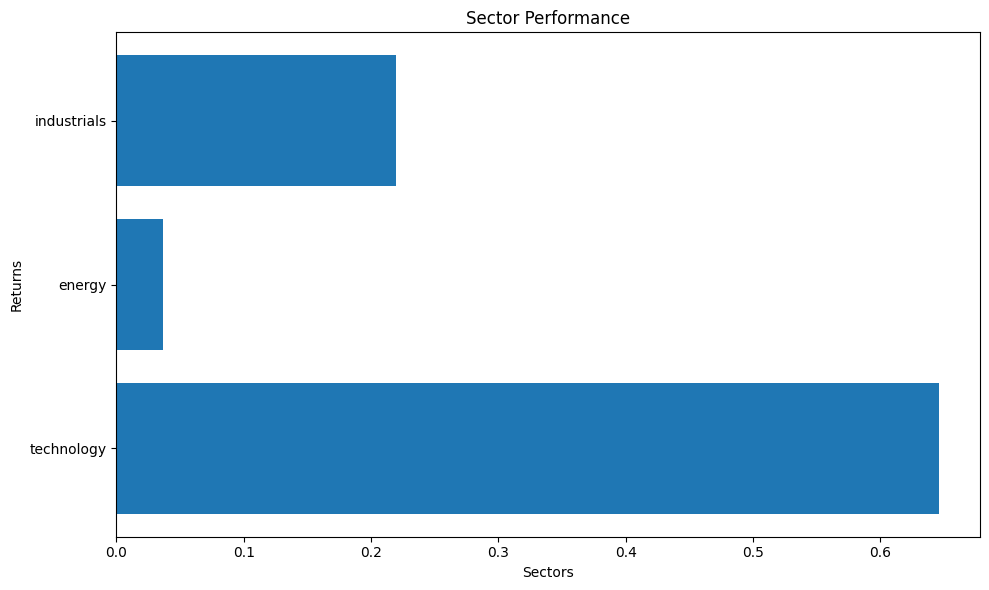

In [85]:
# sector returns
import matplotlib.pyplot as plt

for sector, tickers in SECTORS.items():
    avg_return = total_returns[tickers].mean()
    print(f"{sector}: {avg_return:.2%}")

plt.figure(figsize=(10, 6))
plt.barh(list(sector_returns.keys()), list(sector_returns.values()))
plt.xlabel('Sectors')
plt.ylabel('Returns')
plt.title('Sector Performance')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [90]:
# Find the top 3 best performing stocks in the technology sector based on total return
tech_tickers = SECTORS['technology']
tech_total_returns = total_returns[tech_tickers]
top_3_tech_total_returns = tech_total_returns.nlargest(3)

# Find the top 3 worst performing stocks in the energy sector based on total return
energy_tickers = SECTORS['energy']
energy_total_returns = total_returns[energy_tickers]
worst_3_energy_total_returns = energy_total_returns.nsmallest(3)

print("Top 3 Best Performing Stocks in Technology Sector (Total Return):")
print(top_3_tech_total_returns.apply(lambda x: f"{x:.2%}"))

print("\nTop 3 Worst Performing Stocks in Energy Sector (Total Return):")
print(worst_3_energy_total_returns.apply(lambda x: f"{x:.2%}"))

Top 3 Best Performing Stocks in Technology Sector (Total Return):
Ticker
PLTR    345.02%
AVGO     95.16%
ORCL     70.11%
dtype: object

Top 3 Worst Performing Stocks in Energy Sector (Total Return):
Ticker
SLB    -22.59%
COP    -15.28%
EOG    -14.79%
dtype: object


Summary

This project pulls one year of U.S. stock data directly from Yahoo Finance and compares performance across three sectors: Technology, Energy, and Industrials (manufacturing). I analyzed 30 companies (10 per sector).

What I did:

Calculated per-stock returns, then built daily close-to-close returns.

Found each stock’s best day and worst day (date + % move).

Identified the overall winner (highest single-day gain across all stocks) and the overall loser (largest single-day drop).

Computed sector-level returns by averaging member stocks, so we can see how Tech vs Energy vs Industrials performed over the same period.

Highlighted top performers in Technology and worst performers in Energy to make the results easy to read.

Outcome:

A clear snapshot of which sectors led or lagged over the last year.

A simple leaderboard of best/worst days and best/worst stocks across the 30-name universe.